In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [2]:
df = pd.read_csv('DATA.csv') 

df.head()

,Close,Date
0,133.750000,2010-10-11
1,130.899994,2010-10-12
2,133.350006,2010-10-13
3,132.899994,2010-10-14
4,130.000000,2010-10-15


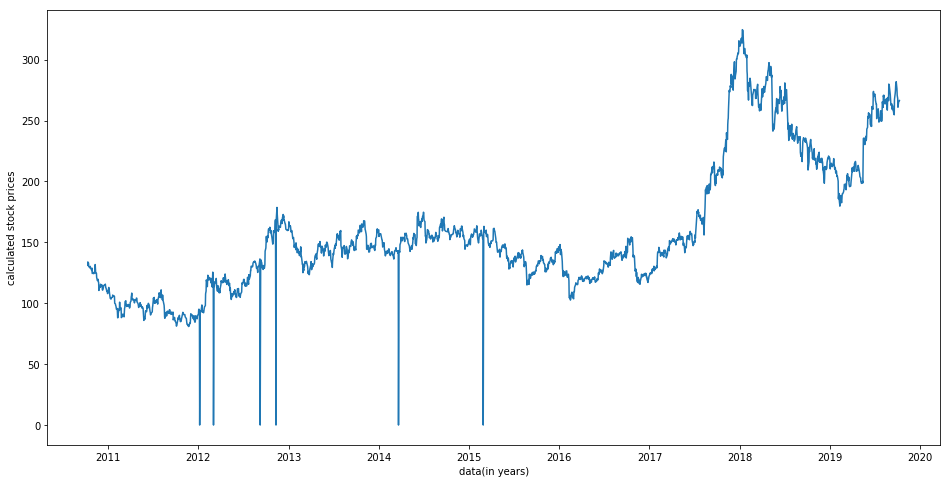

In [3]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

plt.figure(figsize=(16,8))
plt.ylabel('calculated stock prices')
plt.xlabel('data(in years)')
plt.plot(df['Close'])

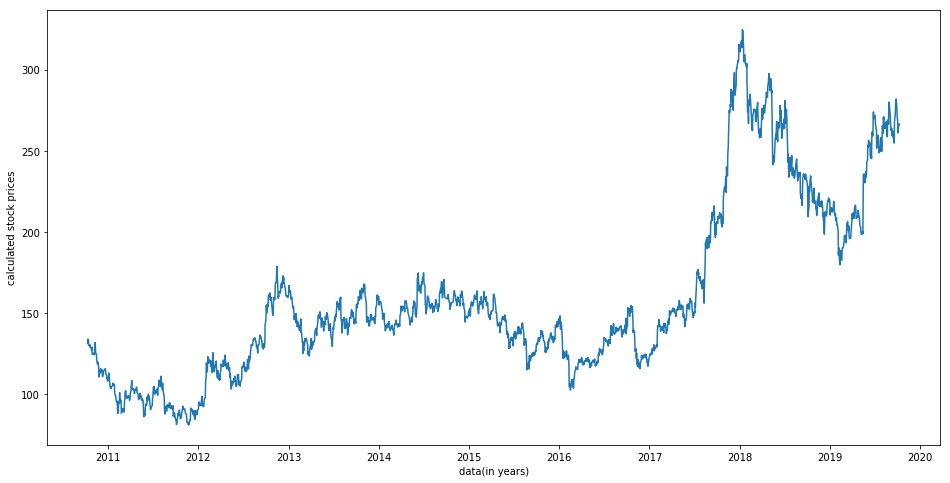

In [4]:
dframe = df[df['Close'] > 50]

plt.figure(figsize=(16,8))
plt.ylabel('calculated stock prices')
plt.xlabel('data(in years)')
plt.plot(dframe['Close'])

In [5]:
#importing required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [18]:
#creating dataframe
data = dframe.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(dframe)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1700,:]
valid = dataset[1700:,:]

#convert the dataset into float otherwise it would give warning on the next line while it try to fit.
dataset = dataset.astype(float)

scaled_data = scaler.fit_transform(dataset)

In [19]:
#calculating the values
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))

model.add(LSTM(units=50))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 270s - loss: 8.4927e-04


In [ ]:
#predicting the test values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

v = valid
cp = closing_price

In [51]:
#for plotting
train = new_data[1400:1700]
valid = new_data[1701:]

new_data

,Close
Date,
2010-10-11,133.75
2010-10-12,130.9
2010-10-13,133.35
2010-10-14,132.9
2010-10-15,130
2010-10-18,129.7
2010-10-19,129.7
2010-10-20,129.15
2010-10-21,130.3


In [55]:
valid.loc[:, 'Predictions'] = cp

/home/dell/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


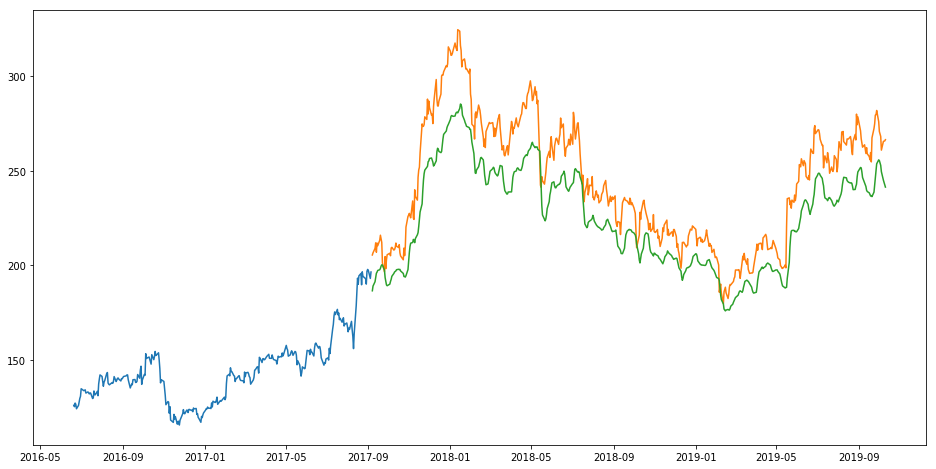

In [56]:
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [57]:
valid['Predictions']

Date
2017-09-07    186.621872
2017-09-08    189.104111
2017-09-11    191.421036
2017-09-12    193.634064
2017-09-13    195.877136
2017-09-14    196.502792
2017-09-15    197.377182
2017-09-18    197.752304
2017-09-19    198.456284
2017-09-20    199.654099
2017-09-21    200.335876
2017-09-22    200.260864
2017-09-25    197.591629
2017-09-26    193.603745
2017-09-27    191.729401
2017-09-28    189.735519
2017-09-29    189.293121
2017-10-03    190.145233
2017-10-04    191.567474
2017-10-05    192.662827
2017-10-06    194.279877
2017-10-09    195.767639
2017-10-10    196.536194
2017-10-11    196.870010
2017-10-12    197.127686
2017-10-13    197.761932
2017-10-16    197.989014
2017-10-17    197.861053
2017-10-18    197.924652
2017-10-19    197.100510
                 ...    
2019-08-26    240.186584
2019-08-27    241.813553
2019-08-28    242.943695
2019-08-29    246.938538
2019-08-30    249.445221
2019-09-03    251.810074
2019-09-04    251.574768
2019-09-05    249.428329
2019-09-06    246.52

In [58]:
valid['Close']

Date
2017-09-07     205.55
2017-09-08      206.7
2017-09-11     209.05
2017-09-12     211.95
2017-09-13        207
2017-09-14     211.85
2017-09-15     210.45
2017-09-18     213.35
2017-09-19        216
2017-09-20      214.1
2017-09-21      212.2
2017-09-22      201.4
2017-09-25     196.65
2017-09-26      204.7
2017-09-27      198.3
2017-09-28     203.05
2017-09-29     205.65
2017-10-03      206.5
2017-10-04     205.15
2017-10-05     209.25
2017-10-06      209.6
2017-10-09     208.15
2017-10-10      208.4
2017-10-11     209.45
2017-10-12     211.85
2017-10-13     210.15
2017-10-16      209.5
2017-10-17        211
2017-10-18      206.7
2017-10-19     205.05
               ...   
2019-08-26     269.25
2019-08-27     266.35
2019-08-28        280
2019-08-29      274.4
2019-08-30     278.55
2019-09-03      271.2
2019-09-04     266.95
2019-09-05     264.55
2019-09-06     262.55
2019-09-09      263.8
2019-09-11      259.2
2019-09-12      262.3
2019-09-13     259.05
2019-09-16     257.55
2019-

In [59]:
err = {}
err = abs(valid['Close'] - valid['Predictions'])
diff = sum(err) / len(err)
accr = 100 - diff
accr

80.90753305741106